In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s1 = pd.read_excel('./session_1_formatted.xlsx')
s2 = pd.read_excel('./session_2_formatted.xlsx')

In [3]:
def game_format(df):
    df[(df.second == 1) & (df.game == 1) & (df.choice == -1)]['choice'].count()
    num_players = df.max()['player']
    data = {'game': [], 'second': [], 'None_Mean': [], 'A_Mean': [], 'B_Mean': []}
    for game in range(1, 21):
        for second in range(1, 61):
            data['game'].append(game)
            data['second'].append(second)
            data['None_Mean'].append(df[(df.second == second) & (df.game == game) & (df.choice == -1)]['choice'].count()/num_players)
            data['A_Mean'].append(df[(df.second == second) & (df.game == game) & (df.choice == 1)]['choice'].count()/num_players)
            data['B_Mean'].append(df[(df.second == second) & (df.game == game) & (df.choice == 2)]['choice'].count()/num_players)

    return pd.DataFrame.from_dict(data)

In [4]:
g1 = game_format(s1)
g2 = game_format(s2)
g1.to_excel('session_1_game_stats.xlsx', engine='xlsxwriter')
g2.to_excel('session_2_game_stats.xlsx', engine='xlsxwriter')

In [11]:
def plot_data(df):
    ge = ['PC 800, 100', 'BOS 800, 100', 'PD 300', 'CS 400', 'IT Dom', 'Strict Dom 300', 'CH1', 'CH2', 'PD 800',
          'Strict Dom 800', 'BOS 800', 'PC0', 'Strict Dom 500', 'Weak Dom Trust 0,600', 'Strict Dom 700', 
          'Anything Goes', 'Mixed Strategy Not CS', 'CS 300', 'Equity Concern Practice Games', 'Weak Trust 0,300']
    for i in range(1, 21):
        g1 = df[df.game == i].drop(columns=['game'])
        g1.plot(x='second', title='Game {}'.format(ge[i-1]))
    plt.show()

## Session 1 Game Plots

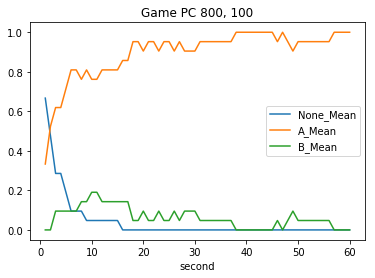

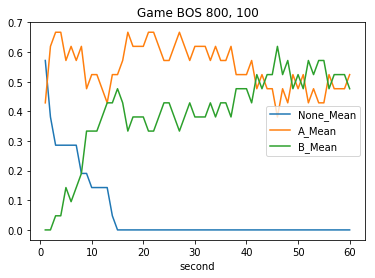

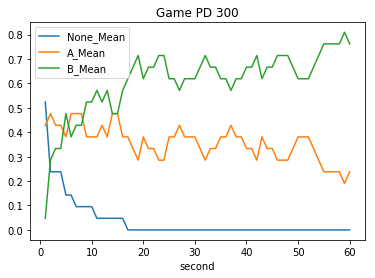

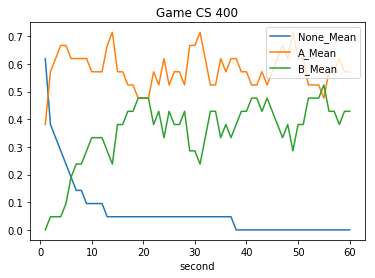

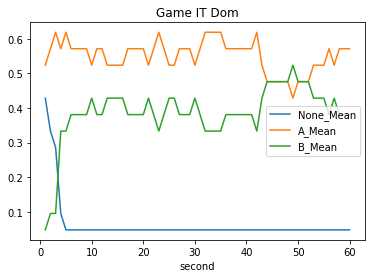

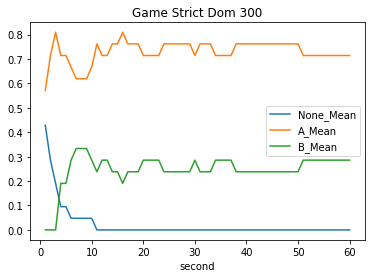

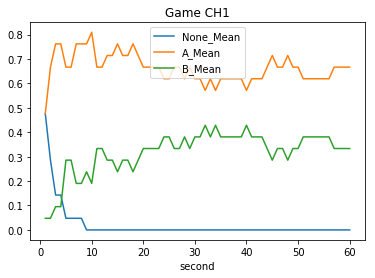

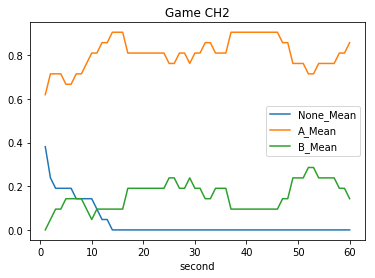

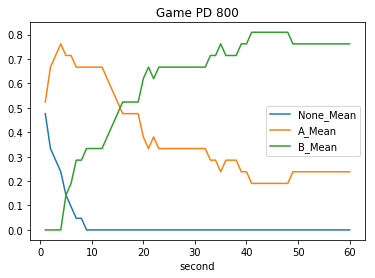

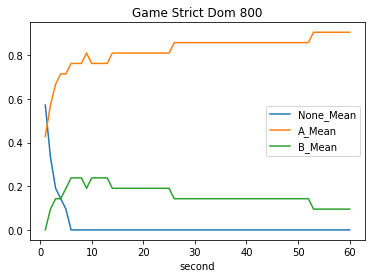

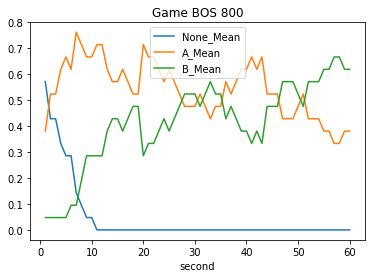

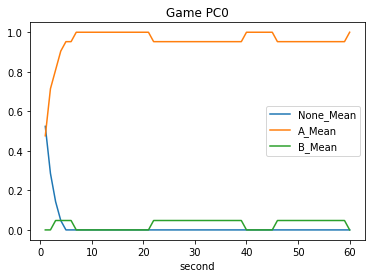

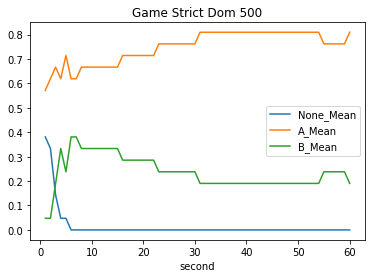

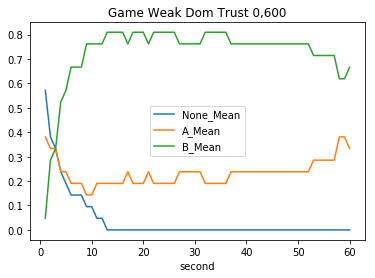

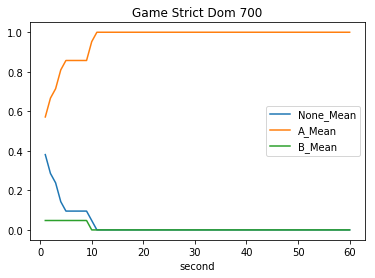

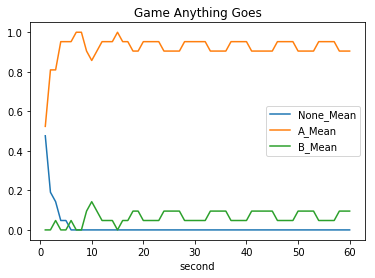

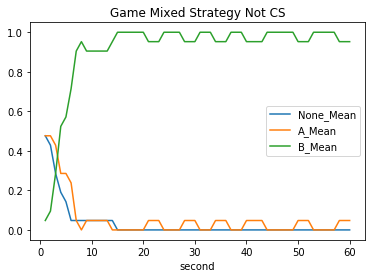

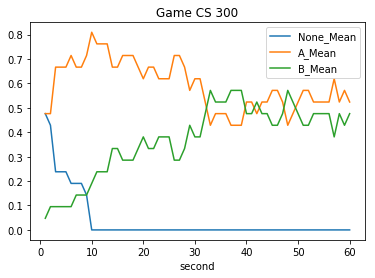

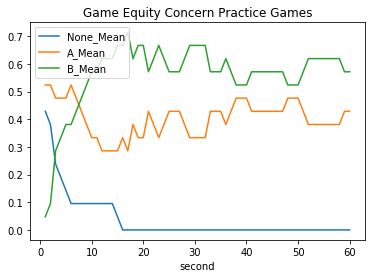

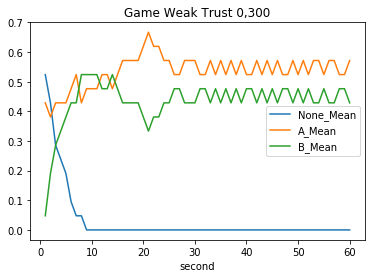

In [12]:
plot_data(game_format(s1))

## Session 2 Game Plots

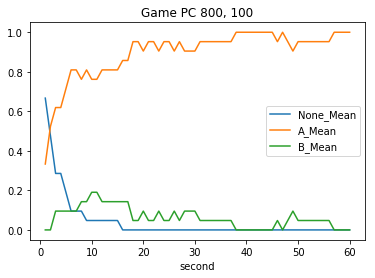

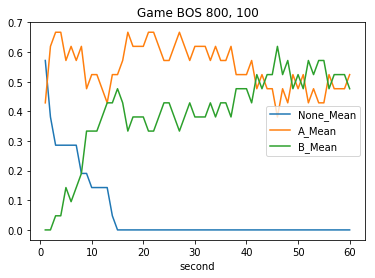

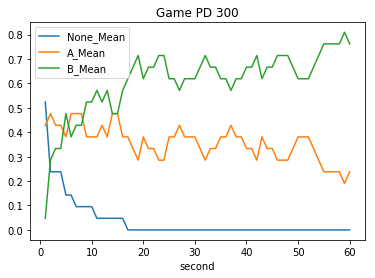

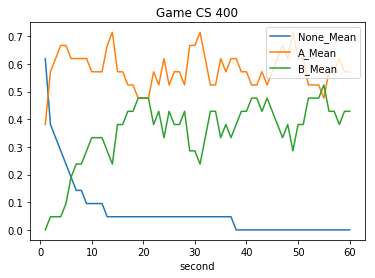

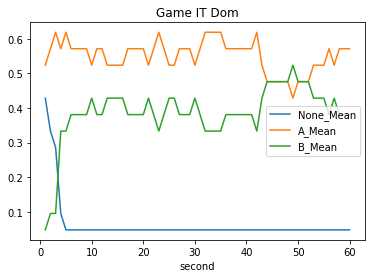

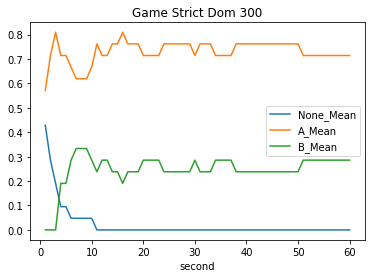

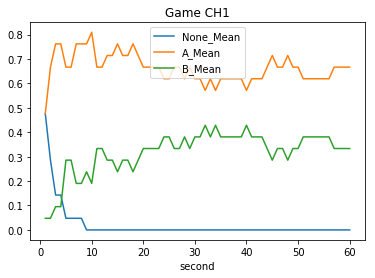

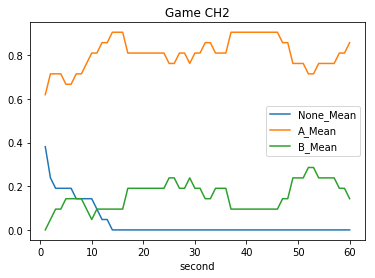

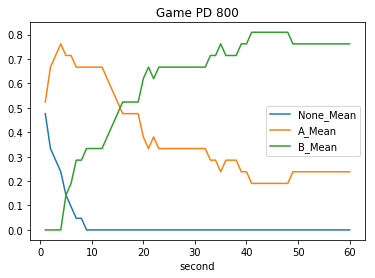

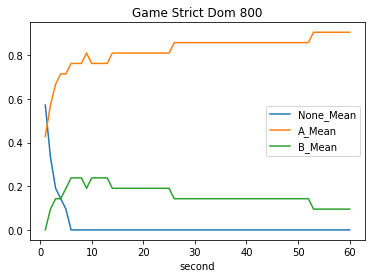

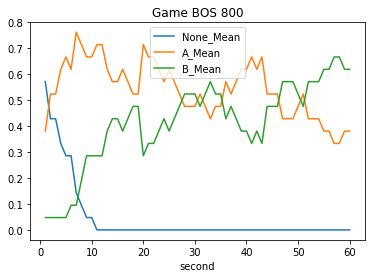

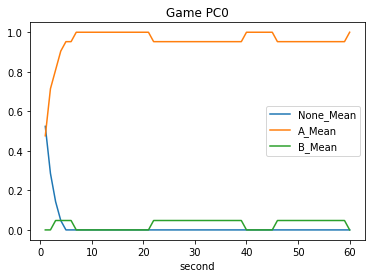

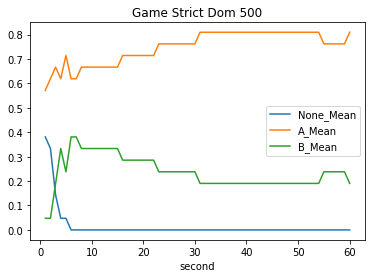

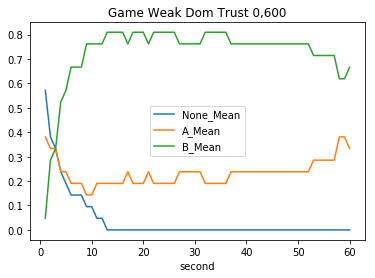

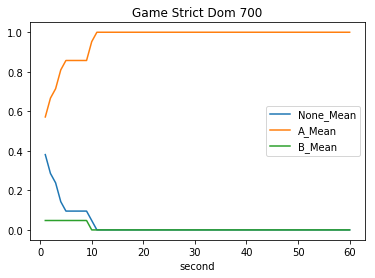

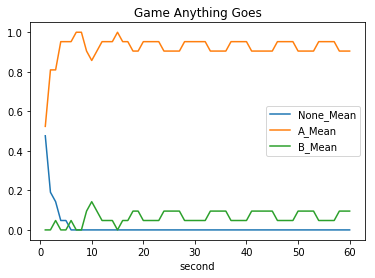

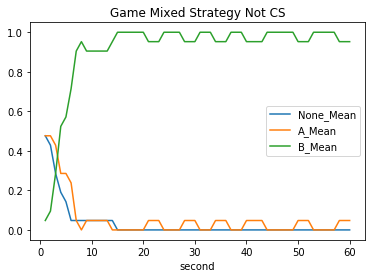

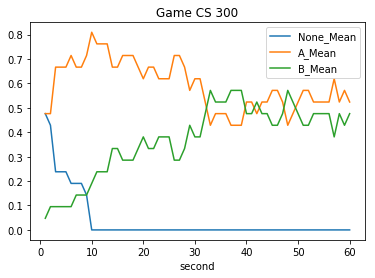

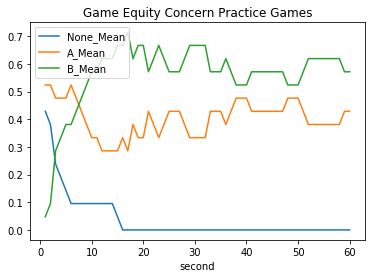

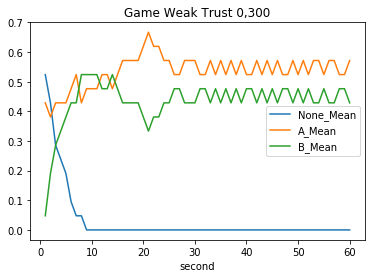

In [13]:
plot_data(game_format(s2))